# Środowiska uruchomieniowe C3. Streamlit 2.
#### Celem tego ćwiczenia jest przedstawienie w uproszczeniu procesu trenowania kilku podstawowych modeli ML. Wykorzystamy słynny zbiór danych z Kaggle - Titanic - Machine Learning from Disaster. Więcej informacji o tych danych można znaleźć na stronie internetowej - https://www.kaggle.com/c/titanic/data 

### 1. Import bibliotek

In [60]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import imblearn
import fastbook
import wandb


from fastbook import *
from fastai.vision.widgets import *

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,PowerTransformer,RobustScaler,Normalizer
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score
from collections import Counter


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif


### 2. Przygotowanie danych do analizy

In [2]:
os.getcwd()

'C:\\Users\\saras\\Documents\\SUML_cw2'

In [3]:
# wandb.init(project="suml_project", entity="quc")

In [4]:
base_data = pd.read_csv("pancreatic.csv",sep=";");
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych

cols = ["patient_cohort","sample_origin","age","sex","plasma_CA19_9","creatinine","LYVE1","REG1B","TFF1","REG1A","diagnosis"]
data = base_data[cols].copy()
# tworzymy kopię naszych danych bez zbędnych kolumn (np. PassengerID i Name)

In [5]:
print(data)

    patient_cohort sample_origin  age sex  plasma_CA19_9  creatinine  \
0          Cohort1          BPTB   33   F           11.7     1.83222   
1          Cohort1          BPTB   81   F            NaN     0.97266   
2          Cohort2          BPTB   51   M            7.0     0.78039   
3          Cohort2          BPTB   61   M            8.0     0.70122   
4          Cohort2          BPTB   62   M            9.0     0.21489   
..             ...           ...  ...  ..            ...         ...   
585        Cohort2          BPTB   68   M            NaN     0.52026   
586        Cohort2          BPTB   71   F            NaN     0.85956   
587        Cohort2          BPTB   63   M            NaN     1.36851   
588        Cohort2          BPTB   75   F            NaN     1.33458   
589        Cohort1          BPTB   74   M         1488.0     1.50423   

        LYVE1       REG1B         TFF1      REG1A  diagnosis  
0    0.893219   52.948840   654.282174   1262.000          1  
1    2.03

In [6]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

patient_cohort    False
sample_origin     False
age               False
sex               False
plasma_CA19_9      True
creatinine        False
LYVE1             False
REG1B             False
TFF1              False
REG1A              True
diagnosis         False
dtype: bool

#### Możemy wygenerować mapę ciepła symbolizującą braki danych - każdy "pomarańczowy pasek" to miejsce, w którym jest brak danych

<AxesSubplot:>

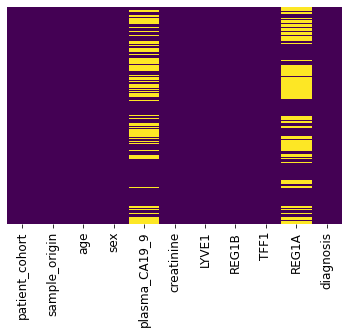

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# cbar ustalamy jako false, ponieważ nie wniesie nam to dodatkowych informacji

In [13]:
# Transformations and additions
data["plasma_CA19_9"].fillna((-1), inplace=True) # wypełni nam brakujące informacje średnią
data["REG1A"].fillna((-1), inplace=True) # wypełni nam brakujące informacje średnią

#data["wzrost"].fillna((data["wzrost"].mean()), inplace=True) # wypełni nam brakujące informacje średnią

In [14]:
data.isnull().any()

patient_cohort    False
sample_origin     False
age               False
sex               False
plasma_CA19_9     False
creatinine        False
LYVE1             False
REG1B             False
TFF1              False
REG1A             False
diagnosis         False
dtype: bool

In [15]:
print(data)

     patient_cohort  sample_origin  age  sex  plasma_CA19_9  creatinine  \
0                 0              0   33    0           11.7     1.83222   
1                 0              0   81    0           -1.0     0.97266   
2                 1              0   51    1            7.0     0.78039   
3                 1              0   61    1            8.0     0.70122   
4                 1              0   62    1            9.0     0.21489   
..              ...            ...  ...  ...            ...         ...   
585               1              0   68    1           -1.0     0.52026   
586               1              0   71    0           -1.0     0.85956   
587               1              0   63    1           -1.0     1.36851   
588               1              0   75    0           -1.0     1.33458   
589               0              0   74    1         1488.0     1.50423   

        LYVE1       REG1B         TFF1      REG1A  diagnosis  
0    0.893219   52.948840   654.2821

In [16]:
encoder = LabelEncoder()
data.loc[:,"patient_cohort"] = encoder.fit_transform(data.loc[:,"patient_cohort"])
# male = 1, female = 0

encoder = LabelEncoder()
data.loc[:,"sample_origin"] = encoder.fit_transform(data.loc[:,"sample_origin"])

encoder = LabelEncoder()
data.loc[:,"sex"] = encoder.fit_transform(data.loc[:,"sex"])

# encoder = LabelEncoder()
# data.loc[:,"Residence_type"] = encoder.fit_transform(data.loc[:,"Residence_type"])

# encoder = LabelEncoder()
# data.loc[:,"smoking_status"] = encoder.fit_transform(data.loc[:,"smoking_status"])

In [17]:
print(data)

     patient_cohort  sample_origin  age  sex  plasma_CA19_9  creatinine  \
0                 0              0   33    0           11.7     1.83222   
1                 0              0   81    0           -1.0     0.97266   
2                 1              0   51    1            7.0     0.78039   
3                 1              0   61    1            8.0     0.70122   
4                 1              0   62    1            9.0     0.21489   
..              ...            ...  ...  ...            ...         ...   
585               1              0   68    1           -1.0     0.52026   
586               1              0   71    0           -1.0     0.85956   
587               1              0   63    1           -1.0     1.36851   
588               1              0   75    0           -1.0     1.33458   
589               0              0   74    1         1488.0     1.50423   

        LYVE1       REG1B         TFF1      REG1A  diagnosis  
0    0.893219   52.948840   654.2821

### 3. Eksploracja danych

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

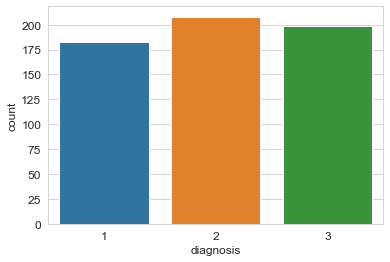

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=data)
# używamy biblioteki seaborn do stworzenia prostego wykresu symbolizującego osoby, które przeżyły (1) i nie przeżyły (0)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

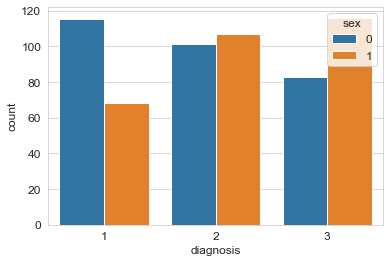

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',hue='sex',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

<AxesSubplot:xlabel='age', ylabel='creatinine'>

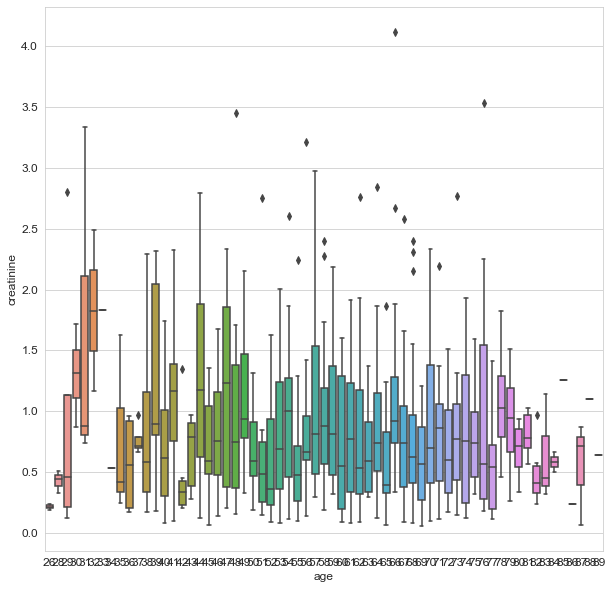

In [20]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='age',y='creatinine',data=data)
# wygenerujemy sobie boxplot, czyli wykres skrzynkowy dla wieku oraz klasy pasażerów

In [21]:
class_count_0, class_count_1, class_count_2 = data['diagnosis'].value_counts()
class_0 = data[data['diagnosis'] == 1]
class_1 = data[data['diagnosis'] == 2]
class_2 = data[data['diagnosis'] == 3]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 1:', class_2.shape)

class 0: (183, 11)
class 1: (208, 11)
class 1: (199, 11)


Classes are balanced so we do not have to deal with imbalanced data :)

In [22]:
print(data)

     patient_cohort  sample_origin  age  sex  plasma_CA19_9  creatinine  \
0                 0              0   33    0           11.7     1.83222   
1                 0              0   81    0           -1.0     0.97266   
2                 1              0   51    1            7.0     0.78039   
3                 1              0   61    1            8.0     0.70122   
4                 1              0   62    1            9.0     0.21489   
..              ...            ...  ...  ...            ...         ...   
585               1              0   68    1           -1.0     0.52026   
586               1              0   71    0           -1.0     0.85956   
587               1              0   63    1           -1.0     1.36851   
588               1              0   75    0           -1.0     1.33458   
589               0              0   74    1         1488.0     1.50423   

        LYVE1       REG1B         TFF1      REG1A  diagnosis  
0    0.893219   52.948840   654.2821

### 4. Trenowanie modelu

We are using classfiers that should perform 

In [23]:
data = data.astype(float)
y = data.iloc[:,10] # survived - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,0:10] # zmienne na podstawie, których chcemy przewidzieć
print(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu
print(Counter(y_train))
print(Counter(y_test))

     patient_cohort  sample_origin   age  sex  plasma_CA19_9  creatinine  \
0               0.0            0.0  33.0  0.0           11.7     1.83222   
1               0.0            0.0  81.0  0.0           -1.0     0.97266   
2               1.0            0.0  51.0  1.0            7.0     0.78039   
3               1.0            0.0  61.0  1.0            8.0     0.70122   
4               1.0            0.0  62.0  1.0            9.0     0.21489   
..              ...            ...   ...  ...            ...         ...   
585             1.0            0.0  68.0  1.0           -1.0     0.52026   
586             1.0            0.0  71.0  0.0           -1.0     0.85956   
587             1.0            0.0  63.0  1.0           -1.0     1.36851   
588             1.0            0.0  75.0  0.0           -1.0     1.33458   
589             0.0            0.0  74.0  1.0         1488.0     1.50423   

        LYVE1       REG1B         TFF1      REG1A  
0    0.893219   52.948840   654.282

In [78]:
#Cross validation
from numpy import mean
from sklearn.preprocessing import QuantileTransformer

kf = KFold(n_splits=3, random_state=42, shuffle=True)

imba_pipeline_gbc_base = make_pipeline(
                            GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,     max_depth=1, random_state=0))

# #standarization 
# imba_pipeline_gbc_base_ss = make_pipeline(QuantileTransformer(n_quantiles=10, random_state=0),
#                             GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,     max_depth=1, random_state=0))


imba_pipeline_gbc_base_ss = make_pipeline(PowerTransformer(),
                            GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,     max_depth=1, random_state=0))


imba_pipeline_rfc_base = make_pipeline(
                              RandomForestClassifier(n_estimators=100, random_state=1,class_weight='balanced'))

imba_pipeline_rfc_base_ss = make_pipeline(PowerTransformer(),
                              RandomForestClassifier(n_estimators=100, random_state=1,class_weight='balanced'))

#Random Forest is agnostic to data standarization and normalization

dc_clsf = DecisionTreeClassifier()

knn_clsf = KNeighborsClassifier()

#standarization
pipeline_knn_base_ss = make_pipeline(QuantileTransformer(n_quantiles=10, random_state=0),  KNeighborsClassifier())

# pipeline_knn_base_ss_pca = make_pipeline(QuantileTransformer(n_quantiles=10, random_state=0), PCA(n_components=5),  KNeighborsClassifier())
#no no gain from using pca ,dimensionality
#MinMaxScaler(),StandardScaler() performed poorly

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)


In [79]:
classfiers= [imba_pipeline_gbc_base,imba_pipeline_gbc_base_ss,imba_pipeline_rfc_base,imba_pipeline_rfc_base_ss,dc_clsf,knn_clsf,pipeline_knn_base_ss,clf]

for clsf in classfiers:
    score_clsf=cross_val_score(clsf, X_train, y_train, scoring='balanced_accuracy', cv=kf)
    print(score_clsf,mean(score_clsf))
    
    clsf.fit(X_train, y_train)
    y_test_predict_clsf = clsf.predict(X_test)
    print(" F1 Score: ",f1_score(y_test,y_test_predict_clsf,average='micro'))
    
#imba_pipeline_rfc_base.fit(X_train, y_train)
#y_test_predict_rfc_base_s=imba_pipeline_rfc_base.predict(X_test)
#y_test_predict_gbc_base_s = imba_pipeline_gbc_base.predict(X_test)


[0.69732877 0.74535186 0.72494759] 0.7225427421210071
 F1 Score:  0.7542372881355932
[0.70361808 0.74535186 0.7312369 ] 0.7267356142384077
 F1 Score:  0.7542372881355932
[0.72285284 0.7761123  0.73755416] 0.7455064334306981
 F1 Score:  0.8050847457627118
[0.72419792 0.7761123  0.74422082] 0.7481770130345131
 F1 Score:  0.8135593220338985
[0.67670049 0.68308888 0.73627766] 0.6986890098879642
 F1 Score:  0.6694915254237288
[0.59769192 0.60087514 0.61785698] 0.6054746776397636
 F1 Score:  0.6610169491525424
[0.64531624 0.67073896 0.70730026] 0.6744518208965875
 F1 Score:  0.6949152542372882
[0.33333333 0.33333333 0.33333333] 0.3333333333333333
 F1 Score:  0.3728813559322034


              precision    recall  f1-score   support

         1.0       0.70      0.84      0.76        31
         2.0       0.69      0.70      0.70        44
         3.0       0.89      0.74      0.81        43

    accuracy                           0.75       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.77      0.75      0.76       118

              precision    recall  f1-score   support

         1.0       0.70      0.84      0.76        31
         2.0       0.69      0.70      0.70        44
         3.0       0.89      0.74      0.81        43

    accuracy                           0.75       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.77      0.75      0.76       118

              precision    recall  f1-score   support

         1.0       0.71      0.87      0.78        31
         2.0       0.79      0.68      0.73        44
         3.0       0.90      0.88      0.89        43

    accuracy        

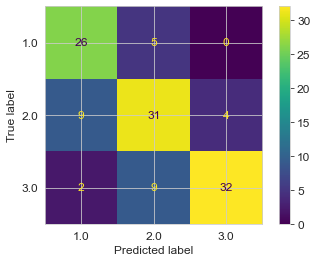

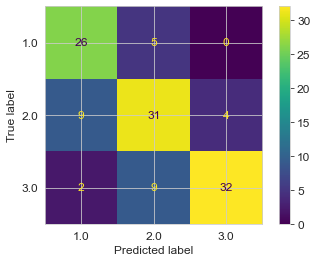

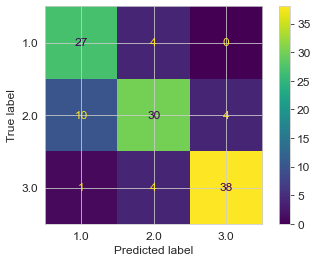

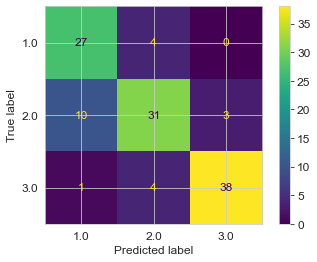

In [81]:
classfiers_sel= [imba_pipeline_gbc_base,imba_pipeline_gbc_base_ss,imba_pipeline_rfc_base,imba_pipeline_rfc_base_ss]

for clsf in classfiers_sel:
    clsf.fit(X_train, y_train)
    y_test_predict_clsf = clsf.predict(X_test)
    print(classification_report(y_test,y_test_predict_clsf))
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_clsf)

In [89]:
# define parametres for hypertuning
params_rfc = {
    'n_estimators': [100, 125 , 150,200,500], #'n_estimators': [10, 50, 100, 200,500],//[ 75, 100, 125 , 150,]
    'max_depth': [ 14,16,18,20, None], #'max_depth': [4, 6, 10, 12, None],//[3, 4 , 5, None]//4 , 10,16, None
    'random_state': [42],
    'class_weight': ['balanced','balanced_subsample'],
}


params_gbc = {
    'n_estimators': [50, 75, 100, 125], #  'n_estimators': [50, 100, 200,500],// [ 75, 100, 125 , 150]
    'learning_rate':[0.8,0.9,1,1.1], #  'learning_rate':[0.5,1.0,2.0,2.5],//[1.5,2.0,2.5]//1,1.5,2.0
    'max_depth': [3,4,5, None], #'max_depth': [4, 6, 10, 12, None],//[3, 4 , 5, None]//4, 10, 16,None
    'random_state': [42],
}

new_params_rfc = {'randomforestclassifier__' + key: params_rfc[key] for key in params_rfc}

new_params_gbc = {'gradientboostingclassifier__' + key: params_gbc[key] for key in params_gbc}

grid_imba_rfc_base = GridSearchCV(imba_pipeline_rfc_base, param_grid=new_params_rfc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba_rfc_base.fit(X_train, y_train);

grid_imba_rfc_base_ss = GridSearchCV(imba_pipeline_rfc_base_ss, param_grid=new_params_rfc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba_rfc_base_ss.fit(X_train, y_train);


grid_imba_gbc_base_ss = GridSearchCV(imba_pipeline_gbc_base_ss, param_grid=new_params_gbc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba_gbc_base_ss.fit(X_train, y_train);


grid_imba_gbc_base = GridSearchCV(imba_pipeline_gbc_base, param_grid=new_params_gbc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba_gbc_base.fit(X_train, y_train);


print(grid_imba_gbc_base.best_score_)
print(grid_imba_gbc_base_ss.best_score_)
print(grid_imba_rfc_base.best_score_)
print(grid_imba_rfc_base_ss.best_score_)

0.7394447579886587
0.7415544626300088
0.7627455723077751
0.758512725415894


{'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__random_state': 42}
 F1 Score:  0.8389830508474576
              precision    recall  f1-score   support

         1.0       0.80      0.90      0.85        31
         2.0       0.77      0.84      0.80        44
         3.0       0.97      0.79      0.87        43

    accuracy                           0.84       118
   macro avg       0.85      0.84      0.84       118
weighted avg       0.85      0.84      0.84       118

{'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__random_state': 42}
 F1 Score:  0.8305084745762712
              precision    recall  f1-score   support

         1.0       0.80      0.90      0.85        31
         2.0       0.77      0.82      0.79        44
         3.0  

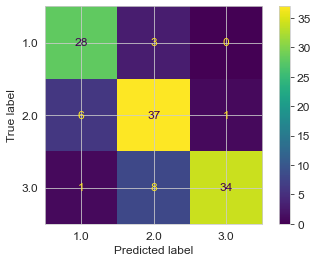

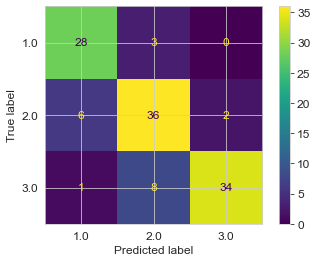

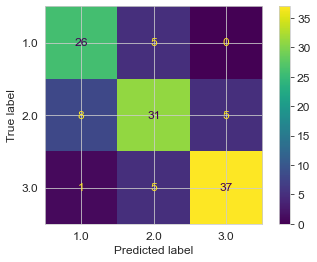

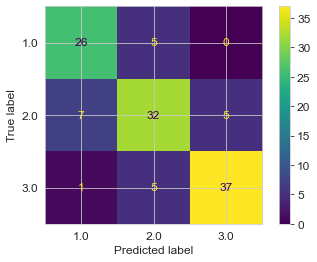

In [90]:
classfiers_sel_ht= [grid_imba_gbc_base,grid_imba_gbc_base_ss,grid_imba_rfc_base,grid_imba_rfc_base_ss]

for clsf in classfiers_sel_ht:
    #clsf.fit(X_train, y_train)
    print(clsf.best_params_)
    y_test_predict_clsf = clsf.predict(X_test)
    print(" F1 Score: ",f1_score(y_test,y_test_predict_clsf,average='micro'))
    print(classification_report(y_test,y_test_predict_clsf))
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_clsf)

In [ ]:
# from sklearn import svm, datasets
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier


# classifier = OneVsRestClassifier(
#     svm.SVC(kernel="linear", probability=True, random_state=42)
# )
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

### Feature importance

In [74]:
bestfeatures = SelectKBest(score_func=f_classif, k=9)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


            Specs       Score
6           LYVE1  121.323096
1   sample_origin   63.762966
7           REG1B   49.941943
8            TFF1   49.838282
2             age   38.340963
0  patient_cohort   32.919796
4   plasma_CA19_9   23.389780
9           REG1A   19.209536
3             sex    4.937783
5      creatinine    3.667715


[0.02421384 0.08052235 0.09393472 0.01488426 0.22237188 0.08638932 0.16037205 0.11017544 0.13233109 0.07480506]


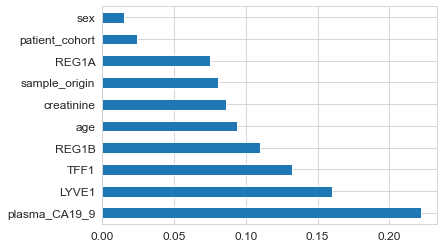

[0.01959961 0.13301701 0.06340691 0.006702   0.34006084 0.07069699 0.1665487  0.06738007 0.0616615  0.07092639]


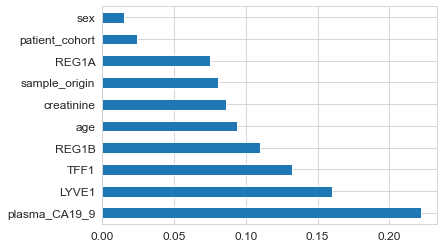

In [91]:
print(grid_imba_rfc_base_ss.best_estimator_._final_estimator.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(grid_imba_rfc_base_ss.best_estimator_._final_estimator.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


print(grid_imba_gbc_base.best_estimator_._final_estimator.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(grid_imba_rfc_base.best_estimator_._final_estimator.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


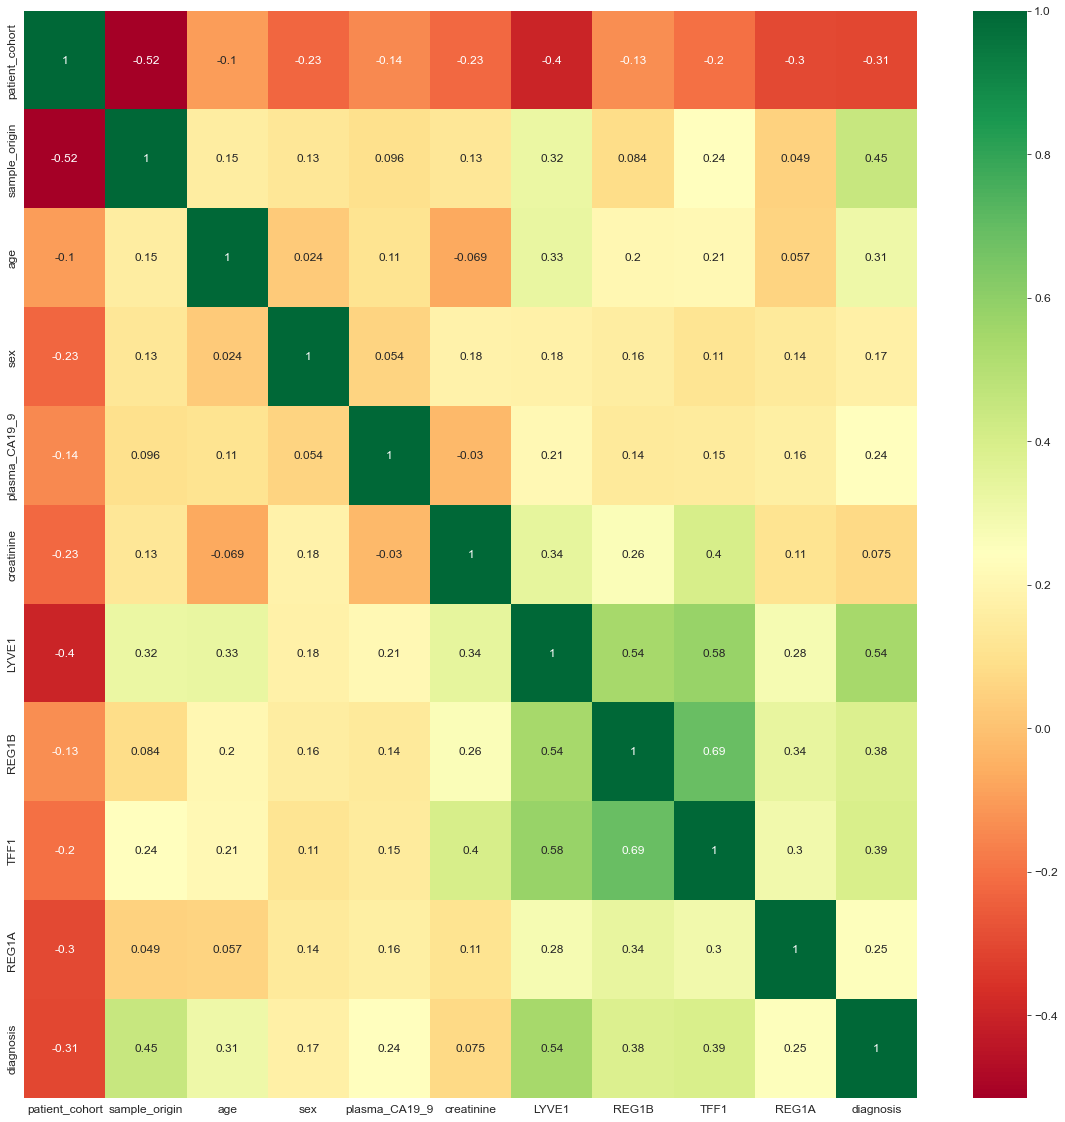

In [92]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn") 

### Feature Selection and reevaluation of the model


In [93]:

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k=9)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [94]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)

In [102]:
# define parametres for hypertuning
# params5 = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [4, 6, 10, 12],
#     'random_state': [13],
#     'class_weight': ['balanced'],
# }


# params6 = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate':[0.5,1.0,2.0],
#     'max_depth': [4, 6, 10, 12],
#     'random_state': [13],
# }


cross_val_score(imba_pipeline_gbc_base, X_train_fs, y_train, scoring='accuracy', cv=kf)

cross_val_score(imba_pipeline_rfc_base_ss, X_train_fs, y_train, scoring='accuracy', cv=kf)


new_params_rfc = {'randomforestclassifier__' + key: params_rfc[key] for key in params_rfc}

new_params_gbc = {'gradientboostingclassifier__' + key: params_gbc[key] for key in params_gbc}

grid_imba5 = GridSearchCV(imba_pipeline_gbc_base, param_grid=new_params_gbc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba5.fit(X_train_fs, y_train);


grid_imba6 = GridSearchCV(imba_pipeline_rfc_base, param_grid=new_params_rfc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba6.fit(X_train_fs, y_train);


grid_imba7 = GridSearchCV(imba_pipeline_gbc_base_ss, param_grid=new_params_gbc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba7.fit(X_train_fs, y_train);

grid_imba8 = GridSearchCV(imba_pipeline_rfc_base_ss, param_grid=new_params_rfc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba8.fit(X_train_fs, y_train);

print(grid_imba5.best_score_)
print(grid_imba6.best_score_)
print(grid_imba7.best_score_)
print(grid_imba8.best_score_)

y_test_predict5 = grid_imba5.predict(X_test_fs)
y_test_predict6 = grid_imba6.predict(X_test_fs)
y_test_predict7 = grid_imba7.predict(X_test_fs)
y_test_predict8 = grid_imba8.predict(X_test_fs)

0.7479507645999623
0.7479238893816014
0.7543201913515548
0.7478970141632401


{'gradientboostingclassifier__learning_rate': 0.9, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 50, 'gradientboostingclassifier__random_state': 42}
F1 Score:  0.788135593220339
              precision    recall  f1-score   support

         1.0       0.79      0.87      0.83        31
         2.0       0.73      0.68      0.71        44
         3.0       0.84      0.84      0.84        43

    accuracy                           0.79       118
   macro avg       0.79      0.80      0.79       118
weighted avg       0.79      0.79      0.79       118

{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 14, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 42}
F1 Score:  0.8220338983050847
              precision    recall  f1-score   support

         1.0       0.75      0.87      0.81        31
         2.0       0.84      0.73      0.78        44
         3.0       0.86

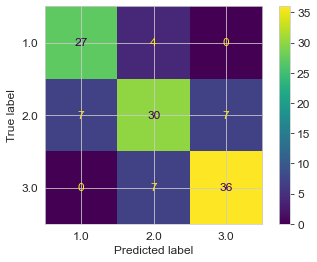

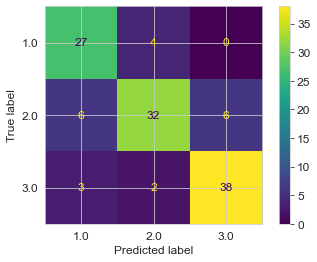

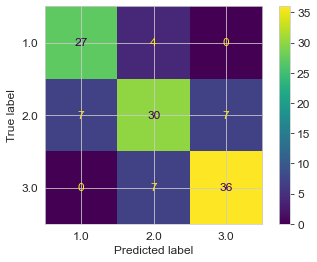

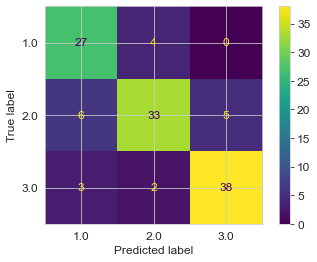

In [105]:
classfiers_fs_sel = [grid_imba5,grid_imba6,grid_imba7,grid_imba8]

for clsf in classfiers_fs_sel:
    print(clsf.best_params_)
    y_test_predict_clsf = clsf.predict(X_test_fs)
    print("F1 Score: ",f1_score(y_test,y_test_predict_clsf,average='micro'))
    print(classification_report(y_test,y_test_predict_clsf))
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_clsf)


### 5. Export the best model

In [112]:
filename = "grid_imba8.sv"
pickle.dump(grid_imba8, open(filename,'wb'))

### 6. Test the model on some data

In [111]:
#"patient_cohort","sample_origin","age","sex","plasma_CA19_9","creatinine","LYVE1","REG1B","TFF1","REG1A","diagnosis"
my_data =[
            [
             1,  #"patient_cohort"
             1,  #"sample_origin"
             47,  #"age"
             -1,  #"plasma_CA19_9"
             1.17,  #"creatinine"
             0.8,  #"LYVE1"
             40.08,  #"REG1B"
             600,  #"TFF1"
             -1,  #"REG1A" 
    ]
]
print(grid_imba5.predict(my_data))
print(grid_imba6.predict(my_data))
print(grid_imba8.predict(my_data))

[3.]
[3.]
[2.]
